# **BIG MART SALES PREDICTION**


![](https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/final-grocery--cover-thumbnail-1200x1200.png)

## **The Problem Statement**
- Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

**The aim is to build a predictive model and find out the sales of each product at a particular store.**
The dataset taken from the [Kaggle Compition Page](https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data)

## **Description of the Dataset**

We have train and test data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

- Item_Identifier: Unique product ID

- Item_Weight: Weight of product

- Item_Fat_Content: Whether the product is low fat or not

- Item_Visibility: The % of total display area of all products in a store allocated to the particular product

- Item_Type: The category to which the product belongs

- Item_MRP: Maximum Retail Price (list price) of the product

- Outlet_Identifier: Unique store ID

- Outlet_Establishment_Year: The year in which store was established

- Outlet_Size: The size of the store in terms of ground area covered

- Outlet_Location_Type: The type of city in which the store is located

- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.



## **Importing Required Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

In [2]:
train_dataset = pd.read_csv('.\Train.csv')
test_dataset = pd.read_csv('.\Train.csv')

In [3]:
train_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [4]:
test_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [5]:
print('The training dataset has {} columns.'.format(train_dataset.shape[1]))
print('The training dataset has {} rows.'.format(train_dataset.shape[0]))

print('The test dataset has {} rows.'.format(test_dataset.shape[0]))
print('The test dataset has {} columns.'.format(test_dataset.shape[1]))

The training dataset has 12 columns.
The training dataset has 8523 rows.
The test dataset has 8523 rows.
The test dataset has 12 columns.


We have to predict 'Item_Outlet_Sales' for test data.
So for the further Exporartory Data Analysis we will merge the train & test data

In [6]:
# In the test dataset we don't have 'Item_Outlet_Sales' column.
# So for the Exporatory Data Analysis we will create a new column as 'Item_Outlet_Sales' in test data.
# And further we will fill 0 for all the observations.
#train_dataset['source'] = 'train_dataset'
#test_dataset['source'] = 'test_dataset'

test_dataset['Item_Outlet_Sales'] = 0
merged_data = pd.concat([train_dataset, test_dataset], sort=False,axis=0, ignore_index=True)

print(train_dataset.shape, test_dataset.shape, merged_data.shape)

(8523, 12) (8523, 12) (17046, 12)


In [7]:
# Let us print records of the dataset
merged_data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15        9.300          Low Fat         0.016047   
1               DRC01        5.920          Regular         0.019278   
2               FDN15       17.500          Low Fat         0.016760   
3               FDX07       19.200          Regular         0.000000   
4               NCD19        8.930          Low Fat         0.000000   
...               ...          ...              ...              ...   
17041           FDF22        6.865          Low Fat         0.056783   
17042           FDS36        8.380          Regular         0.046982   
17043           NCJ29       10.600          Low Fat         0.035186   
17044           FDN46        7.210          Regular         0.145221   
17045           DRG01       14.800          Low Fat         0.044878   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
17041            Snack Foods  214.5218            OUT013   
17042           Baking Goods  108.1570            OUT045   
17043     Health and Hygiene   85.1224            OUT035   
17044            Snack Foods  103.1332            OUT018   
17045            Soft Drinks   75.4670            OUT046   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
17041                       1987        High               Tier 3   
17042                       2002         NaN               Tier 2   
17043                       2004       Small               Tier 2   
17044                       2009      Medium               Tier 3   
17045                       1997       Small               Tier 1   

             Outlet_Type  Item_Outlet_Sales  
0      Supermarket Type1          3735.1380  
1      Supermarket Type2           443.4228  
2      Supermarket Type1          2097.2700  
3          Grocery Store           732.3800  
4      Supermarket Type1           994.7052  
...                  ...                ...  
17041  Supermarket Type1             0.0000  
17042  Supermarket Type1             0.0000  
17043  Supermarket Type1             0.0000  
17044  Supermarket Type2             0.0000  
17045  Supermarket Type1             0.0000  

[17046 rows x 12 columns]

The dataset contains 114204 rows and 12 columns. Each row of the dataset contains information about unique product. 

Our objective is to find a way to predict/estimate the value in the "Item_Outlet_Sales" column using the values in the other columns. If we can do so for the historical data, then we should able to predict sales for new outlets too, simply by asking for information like their 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
'Item_Type', 'Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'.

Let's check the data type for each column.

In [8]:
# Now we will find more information about the dataset using 'info' attribute
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17046 entries, 0 to 17045
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            17046 non-null  object 
 1   Item_Weight                14120 non-null  float64
 2   Item_Fat_Content           17046 non-null  object 
 3   Item_Visibility            17046 non-null  float64
 4   Item_Type                  17046 non-null  object 
 5   Item_MRP                   17046 non-null  float64
 6   Outlet_Identifier          17046 non-null  object 
 7   Outlet_Establishment_Year  17046 non-null  int64  
 8   Outlet_Size                12226 non-null  object 
 9   Outlet_Location_Type       17046 non-null  object 
 10  Outlet_Type                17046 non-null  object 
 11  Item_Outlet_Sales          17046 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.6+ MB


Looks like 'Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year' and 'Item_Outlet_Sales' are numerical features/columns, whereas 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type' and "Outlet_Sales' are strings/objects.

In [9]:
# Let us look at the statistical information about the dataset(min, max, mean, count etc.)
merged_data.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  14120.000000     17046.000000  17046.000000               17046.000000   
mean      12.857645         0.066132    140.992782                1997.831867   
std        4.643292         0.051596     62.273240                   8.371515   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.773750         0.026988     93.817950                1987.000000   
50%       12.600000         0.053931    143.012800                1999.000000   
75%       16.850000         0.094594    185.652250                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       17046.000000  
mean         1090.644457  
std          1626.517802  
min             0.000000  
25%             0.000000  
50%            16.645000  
75%          1794.331000  
max         13086.964800

The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "Outlet_Sales" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.


> 1. The range of sales in the numerical column seems to have lot of difference in 75 percentile and the maximun charges.
> 2. The range of values in 'Item_Weight' and 'Item_Visibility' columns seems reasonable.

In [10]:
# We will also check categorical features information(unique, top, frequency etc.)
merged_data.describe(include="O")

Item_Identifier Item_Fat_Content              Item_Type  \
count            17046            17046                  17046   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                20            10178                   2464   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count              17046       12226                17046              17046  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                1870        5586                 6700              11154

In [11]:
# Now let us find the categorical features from the dataset
categorical_features = merged_data.select_dtypes(include = ['O'])
categorical_features.head()

Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
3         NaN               Tier 3      Grocery Store  
4        High               Tier 3  Supermarket Type1

In [12]:
# We will also find numerical features from the dataset
numrical_features = merged_data.select_dtypes(exclude = ['O'])
numrical_features.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

We can see that dataset has 5 numerical features.

In [13]:
# Now we will find unique labels in each categorical feature.
for feature in categorical_features:
    print('The unique label in {} : {}'.format(feature, categorical_features[feature].unique()))

The unique label in Item_Identifier : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
The unique label in Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
The unique label in Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
The unique label in Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
The unique label in Outlet_Size : ['Medium' nan 'High' 'Small']
The unique label in Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
The unique label in Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


We found that typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:
> The dataset contain five different labels for the fat content:LF, low fat, Low Fat, Regular and reg. Clearly, LF,  low fat and Low Fat are the same, also reg and regular are same. Hense we replace LF and low fat by Low Fat and reg by regular. 

In [14]:
# First we will replace "LF" to "Low Fat" , "low fat" to "Low Fat" and "reg" to "Regular"
merged_data['Item_Fat_Content'] = merged_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
merged_data['Item_Fat_Content'].value_counts()


Low Fat    11034
Regular     6012
Name: Item_Fat_Content, dtype: int64

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Item_Outlet_Sales" and other columns.

> We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

**1. Item Fat Content**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

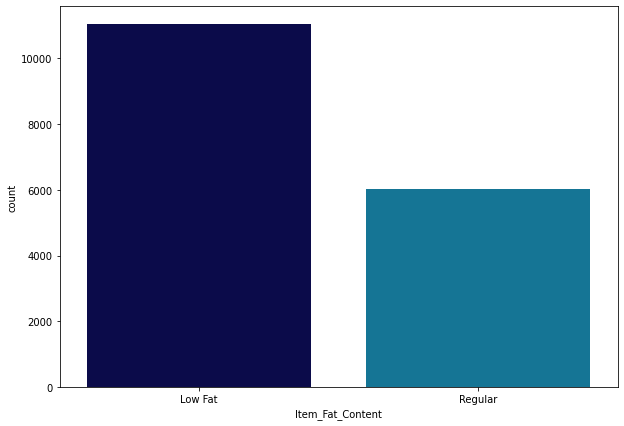

In [15]:
# Now visualise count plot of "Item_Fat_Content"
plt.figure(figsize=(10,7))
sns.countplot('Item_Fat_Content', data=merged_data, palette='ocean')

**Observation**

- The most sold items from Bigmart are Low Fat.

**2. Item Type**

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

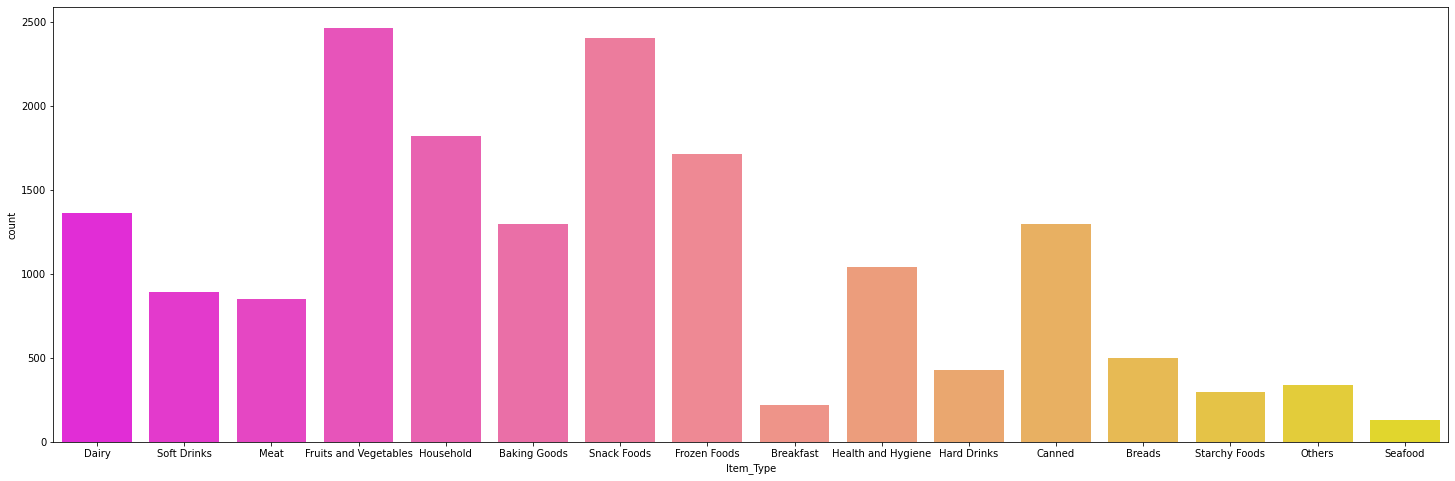

In [16]:
# Visualise count plot of "Item_Type"
plt.figure(figsize=(25,8))
sns.countplot('Item_Type', data=merged_data, palette='spring')

**Observation**

- Fruits & vegetables and Snack foods looks most popular items. 

**3. Outlet Size**

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

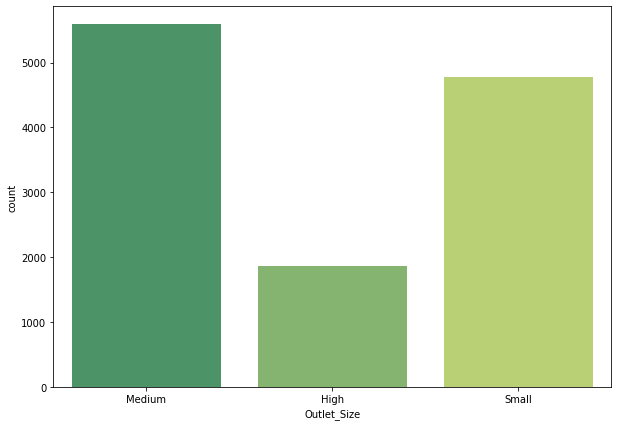

In [17]:
# Visualise count plot of "Outlet_Size"
plt.figure(figsize= (10,7))
sns.countplot('Outlet_Size', data=merged_data, palette= 'summer')

**Observation**

- From the chart we can see that the Bigmarts medium size Outlets are in maximum numbers.

**4. Outlet Location Type**

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

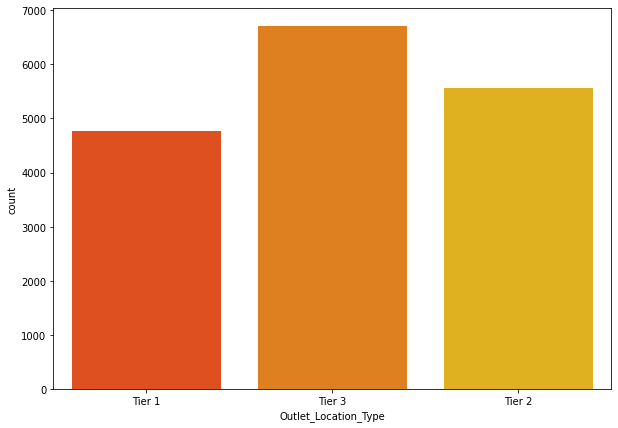

In [18]:
# Visualise count plot of "Outlet_Location_Type"
plt.figure(figsize=(10,7))
sns.countplot('Outlet_Location_Type', data=merged_data, palette= 'autumn')

**Observation**

- We can see that the maximum number of outlets in the Tier 3 cities.

**5. Outlet Type**

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

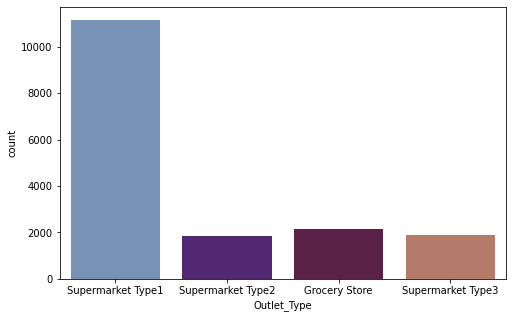

In [19]:
# Visualise count plot of "Outlet_Type"
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type', data=merged_data, palette= 'twilight')

**Observation**

- The huge number of outlets are of Supermarket Type1.

### **B. Bivariate Analysis**

### Numerical Features Analysis

#### 1. Item_Weight

In [20]:
fig = px.histogram(data_frame=merged_data, x='Item_Weight', y='Item_Outlet_Sales', width=800, height=500,
                    title="Item_Weight")
fig.show()

The data is very spreaded, no specific pattern.

#### 2. Item_Visibility

In [21]:
fig = px.histogram(data_frame=merged_data, x='Item_Visibility', y='Item_Outlet_Sales', width=800, height=500,
                    title="Sales by Item Visibility")
fig.show()

Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.

#### 3. Item_MRP

In [22]:
fig =px.histogram(data_frame=merged_data, x="Item_MRP", y='Item_Outlet_Sales', width=800, height=500,
                title="Item MRP")
fig.show()                

From the above plot, items with higher MRP tend to sell better in most cases.

**4. Item Outlet Sales**

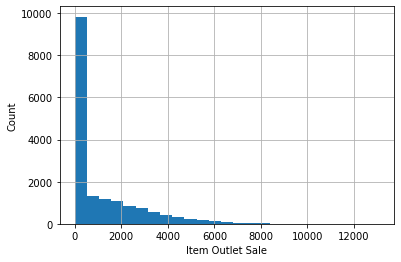

In [23]:
merged_data['Item_Outlet_Sales'].hist(bins=25)
plt.xlabel("Item Outlet Sale")
plt.ylabel("Count")
plt.show()

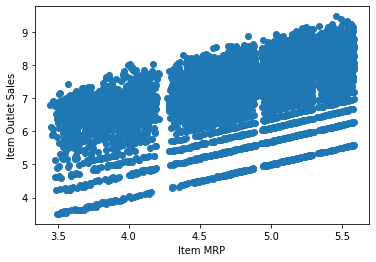

In [24]:
# We will be using logarithmic transformation 
data = merged_data.copy()
data['Item_MRP'] = np.log(data['Item_MRP'])
data['Item_Outlet_Sales'] = np.log(data['Item_Outlet_Sales'])
plt.scatter(data["Item_MRP"], data['Item_Outlet_Sales'])
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.show()

### Categorical Features Analysis

**1. Item_Fat_Content**

In [25]:
# Now visualise the "Item_Outlet_Sale" based on "Item_Fat_Content"
fig = px.pie(merged_data, names='Item_Fat_Content', values='Item_Outlet_Sales', width=800, height=500,
            title= 'Outlet Sales by Item Fat Content')
fig.show()

**Observations**

The Item Outles sales are higher for Low Fat as compared to Regular Item types.

**2.Item_Type**

In [26]:
# Now visualise the "Item_Outlet_Sale" based on "Item_Type"
fig = px.pie(merged_data, names='Item_Type', values='Item_Outlet_Sales', title= 'Sales by Item Type' )
fig.show()

We make some observations from the above chart:
> About 50% of the total sales was by four item type categories(Fruites & vegetables, Snack Foods, Household, Frozen Foods).

> Some of the item types have very low sales as Seafood sale was 0.80% , Breakfast sale was 1.25%, Others 1.75% and Starchy foods was 1.89% of the total sales.

**3. Outlet Identifier**

In [27]:
fig = px.pie(merged_data, names='Outlet_Identifier', values="Item_Outlet_Sales", width=800, height=500, title="Sales by Outlet Identifier")
fig.show()

From the above chart, 
> we can say that the sale of Outlet (OUT027) has near about 19% of the total sales.

> Remaning 7 outlets have similar percentage of sales. Only two outlets OUT010 & OUT019 have lowest sales (0.97% & 1.01% of the totatl sales).

**4. Outlet_Size**

In [28]:
# Now visualise the "Item_Outlet_Sale" by "Outlet_Size" feature
fig = px.pie(merged_data, names='Outlet_Size', values='Item_Outlet_Sales', title= 'Sales by Outlet_Size', 
width=800, height=500)
fig.show()

> The sale of high size outlets was lower than medium & small size outlets. About 40% of the sale was throgh the medium size outlets.

> Only 11% sale through the high size outlets.

**5. Outlet_Location_Type**

In [29]:
# Now visualise the "Item_Outlet_Sale" by "Outlet_Location_Type" feature
fig = px.pie(data_frame=merged_data, names='Outlet_Location_Type', values='Item_Outlet_Sales', width=800, height=500,
            title= "Sales by Outlet Location Type")
fig.show()

**Observation**

From the above graph we can see that maximum number of the total sale is through Tier3 cities.

**6. Outlet_Type**

In [30]:
# Now visualise the "Item_Outlet_Sale" by "Outlet_Type" feature
fig = px.pie(data_frame=merged_data, names='Outlet_Type', values='Item_Outlet_Sales', width=800, height=500,
            title = "Sales by Outlet Type")
fig.show()

**Observation**

> From the above graph we can see that about 70% of the total sale is through Supermarket Type1 outlet.

> Grocery store sale was very low sale as comapred to other outlet types.

### **C. Multivariate Analysis**

In [31]:
fig = px.box(merged_data, x="Item_Type", y="Item_Outlet_Sales", color="Item_Fat_Content",
            title="Sales by Item Fat Content and Item Type",
            width=800, height=400,
            )
fig.show()

In [32]:
fig = px.histogram(merged_data, x="Item_Type", y="Item_Outlet_Sales", color="Outlet_Location_Type",
            title="Sales by Outlet Location Type and Item Type",
            width=800, height=400)

fig.show()

From the above chart we can see that, the Breakfast, Others, Starchy Foods, Breads and Seafoods item types have very low sale through all Tier 1, Tier 2 and Tier 3 cities.

In [33]:
fig = px.box(merged_data, x="Outlet_Identifier", y="Item_Weight", width=800, height=500, title="Item Weight Vs Outlet Identifier")
fig.show()

We now turn our attention to the Item_Visibility, i.e. the percentage of display space in a store devoted to that particular item. Looking at the average visibility of items in each shop,neatly confirms our earlier suspicion that grocery stores have a smaller selection of wares on offer, i.e. the average visibility per item is higher than in supermarkets.

In [34]:
# Creating a feature that describes the no of years the outlet has been in existence.
merged_data['Current_Year'] = (2021 - merged_data.Outlet_Establishment_Year)
merged_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Current_Year  
0  Supermarket Type1          3735.1380            22  
1  Supermarket Type2           443.4228            12  
2  Supermarket Type1          2097.2700            22  
3      Grocery Store           732.3800            23  
4  Supermarket Type1           994.7052            34

In [35]:
px.box(data_frame=merged_data, x= 'Current_Year', y= 'Item_Outlet_Sales', width=800, height=500,
       title='Current  Year Vs Item Outlet Sales')

### Outlier Visualisation


In [36]:
# Plotting the box chart for 'Item_MRP' to checck outliers
fig = px.box(merged_data, y="Item_MRP", width=800, height=500) 
  
# showing the plot
fig.show()

The above box plot shows that "Item_MRP" feature has no outliers.

In [37]:
# Plotting the box chart for 'Item_Weight' to checck outliers
fig = px.box(merged_data, y="Item_Weight", width=800, height=500) 
  
# showing the plot
fig.show()

The Box plot shows no outliers in the "Item_Weight" feature.

## **Data Cleaning**

In [38]:
merged_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2926
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4820
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Current_Year                    0
dtype: int64

In [39]:
merged_data.isnull().sum()/merged_data.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Current_Year                  0.000000
dtype: float64

We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

**1. Item Weight**

Box Plot shows no "Outliers" and hence we can impute the missing values with "Mean".

In [40]:
merged_data['Item_Weight'] = merged_data['Item_Weight'].fillna(merged_data['Item_Weight'].mean())

In [41]:
merged_data['Item_Weight'].isnull().sum()

0

We have succesfully imputed the missing values from the column Item_Weight.

**2. Outlet Size**

In [42]:
merged_data['Outlet_Size'].value_counts()

Medium    5586
Small     4776
High      1864
Name: Outlet_Size, dtype: int64

Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [43]:
merged_data['Outlet_Size'] = merged_data['Outlet_Size'].fillna(merged_data['Outlet_Size'].mode()[0])

In [44]:
merged_data['Outlet_Size'].isna().sum()

0

We have succesfully imputed the missing values from the column Outlet_Size.

In [45]:
merged_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Current_Year  
0  Supermarket Type1          3735.1380            22  
1  Supermarket Type2           443.4228            12  
2  Supermarket Type1          2097.2700            22  
3      Grocery Store           732.3800            23  
4  Supermarket Type1           994.7052            34

## **Correlation**

Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="460">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation [here](https://www.youtube.com/watch?v=xZ_z8KWkhXE)

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [46]:
merged_data.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.006059        -0.067473  0.297733   
Current_Year                  0.008301         0.074834 -0.005020   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.008301           0.006059   
Item_Visibility                            -0.074834          -0.067473   
Item_MRP                                    0.005020           0.297733   
Outlet_Establishment_Year                   1.000000          -0.025775   
Item_Outlet_Sales                          -0.025775           1.000000   
Current_Year                               -1.000000           0.025775   

                           Current_Year  
Item_Weight                    0.008301  
Item_Visibility                0.074834  
Item_MRP                      -0.005020  
Outlet_Establishment_Year     -1.000000  
Item_Outlet_Sales              0.025775  
Current_Year                   1.000000

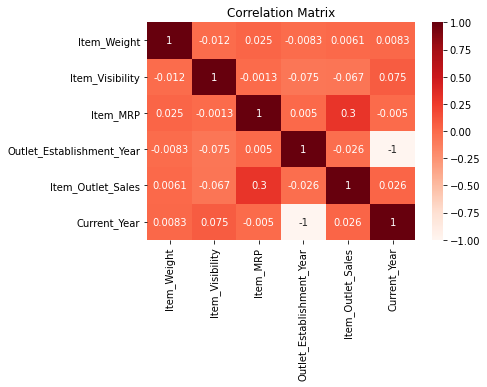

In [47]:
sns.heatmap(merged_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 


In [48]:
data = merged_data[['Item_Weight','Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']]
data.head(2)

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.016047        Dairy  249.8092   
1         5.92          Regular         0.019278  Soft Drinks   48.2692   

  Outlet_Size Outlet_Location_Type        Outlet_Type  \
0      Medium               Tier 1  Supermarket Type1   
1      Medium               Tier 3  Supermarket Type2   

   Outlet_Establishment_Year  
0                       1999  
1                       2009

In [49]:
data.to_csv('cleaned_data.csv')

In [50]:
train_dataset = merged_data.iloc[0:8523]
test_dataset = merged_data.iloc[8523:]

In [51]:
train_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Current_Year  
0     Supermarket Type1          3735.1380            22  
1     Supermarket Type2           443.4228            12  
2     Supermarket Type1          2097.2700            22  
3         Grocery Store           732.3800            23  
4     Supermarket Type1           994.7052            34  
...                 ...                ...           ...  
8518  Supermarket Type1          2778.3834            34  
8519  Supermarket Type1           549.2850            19  
8520  Supermarket Type1          1193.1136            17  
8521  Supermarket Type2          1845.5976            12  
8522  Supermarket Type1           765.6700            24  

[8523 rows x 13 columns]

In [52]:
test_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8523            FDA15        9.300          Low Fat         0.016047   
8524            DRC01        5.920          Regular         0.019278   
8525            FDN15       17.500          Low Fat         0.016760   
8526            FDX07       19.200          Regular         0.000000   
8527            NCD19        8.930          Low Fat         0.000000   
...               ...          ...              ...              ...   
17041           FDF22        6.865          Low Fat         0.056783   
17042           FDS36        8.380          Regular         0.046982   
17043           NCJ29       10.600          Low Fat         0.035186   
17044           FDN46        7.210          Regular         0.145221   
17045           DRG01       14.800          Low Fat         0.044878   

                   Item_Type  Item_MRP Outlet_Identifier  \
8523                   Dairy  249.8092            OUT049   
8524             Soft Drinks   48.2692            OUT018   
8525                    Meat  141.6180            OUT049   
8526   Fruits and Vegetables  182.0950            OUT010   
8527               Household   53.8614            OUT013   
...                      ...       ...               ...   
17041            Snack Foods  214.5218            OUT013   
17042           Baking Goods  108.1570            OUT045   
17043     Health and Hygiene   85.1224            OUT035   
17044            Snack Foods  103.1332            OUT018   
17045            Soft Drinks   75.4670            OUT046   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8523                        1999      Medium               Tier 1   
8524                        2009      Medium               Tier 3   
8525                        1999      Medium               Tier 1   
8526                        1998      Medium               Tier 3   
8527                        1987        High               Tier 3   
...                          ...         ...                  ...   
17041                       1987        High               Tier 3   
17042                       2002      Medium               Tier 2   
17043                       2004       Small               Tier 2   
17044                       2009      Medium               Tier 3   
17045                       1997       Small               Tier 1   

             Outlet_Type  Item_Outlet_Sales  Current_Year  
8523   Supermarket Type1                0.0            22  
8524   Supermarket Type2                0.0            12  
8525   Supermarket Type1                0.0            22  
8526       Grocery Store                0.0            23  
8527   Supermarket Type1                0.0            34  
...                  ...                ...           ...  
17041  Supermarket Type1                0.0            34  
17042  Supermarket Type1                0.0            19  
17043  Supermarket Type1                0.0            17  
17044  Supermarket Type2                0.0            12  
17045  Supermarket Type1                0.0            24  

[8523 rows x 13 columns]

In [53]:
print(train_dataset.shape, test_dataset.shape, merged_data.shape)

(8523, 13) (8523, 13) (17046, 13)


In [54]:
test_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Current_Year'],
      dtype='object')

In [55]:
test = test_dataset.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Current_Year'], axis=1)
test.shape

(8523, 9)

In [56]:
test = test[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Size', 
            'Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']]

In [57]:
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Current_Year'],
      dtype='object')

In [58]:
X = train_dataset[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']]
X.head(2)       

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.016047        Dairy  249.8092   
1         5.92          Regular         0.019278  Soft Drinks   48.2692   

  Outlet_Size Outlet_Location_Type        Outlet_Type  \
0      Medium               Tier 1  Supermarket Type1   
1      Medium               Tier 3  Supermarket Type2   

   Outlet_Establishment_Year  
0                       1999  
1                       2009

In [59]:
y = train_dataset['Item_Outlet_Sales']
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [60]:
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Current_Year'],
      dtype='object')

## **Scaling down numerical data**

Different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

## **Encoding Categorical Features**


### One-hot Encoding

The dataset contains five categorical features & each feature has unique labels, so we'll need to use one hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

In [61]:
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


## **Model Building**

In [62]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape, X_test.shape

((6818, 9), (1705, 9))

In [64]:
X_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet_Establishment_Year'],
      dtype='object')

In [65]:
X_train.head(5)

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
549         9.500          Regular         0.035206  Fruits and Vegetables   
7757       18.000          Low Fat         0.047473              Household   
764        17.600          Regular         0.076122                   Meat   
6867        8.325          Low Fat         0.029845  Fruits and Vegetables   
2716       12.850          Low Fat         0.137228            Snack Foods   

      Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  \
549   171.3448      Medium               Tier 1  Supermarket Type1   
7757  170.5422      Medium               Tier 2  Supermarket Type1   
764   111.7202       Small               Tier 1  Supermarket Type1   
6867   41.6138      Medium               Tier 2  Supermarket Type1   
2716  155.5630       Small               Tier 1  Supermarket Type1   

      Outlet_Establishment_Year  
549                        1999  
7757                       2002  
764                        1997  
6867                       2002  
2716                       1997

## Mean Squared Error
* Mean Square Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJx07wcmwTmzb99LRLIV-New-fPKFfYbSvoVaW0mtTZcEStRtdcWqaZyE4VIz8RMJMLEc&usqp=CAU" width='360'>


### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets(y_test) and predictions(y_pred) (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">


## **Linear Regression**

In [66]:
linear_reg_clf = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg_clf.fit(X_train, y_train)

y_pred = linear_reg_clf.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print("The R-squared value using Linear Regression :{}".format(linear_reg_r2_score))

The Mean Squared Error using Linear Regression :1142642.1586228032
The Root Mean Squared Error using Linear Regression :1068.9444132520657
The R-squared value using Linear Regression :0.5795972249079466


## **Decision Tree Regressor**

In [67]:
decision_tree_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree_clf.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree_clf.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred1)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The The Root Mean Squared Error Using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The R-squared value using Decision Tree :{}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 1080994.1933098445
The The Root Mean Squared Error Using Decision Tree Regressor : 1039.7087059892517
The R-squared value using Decision Tree :0.6022788453091958


## **Random Forest Regressor**

In [68]:
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_regressor', RandomForestRegressor())])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 1200180.9569157113
The The Root Mean Squared Error Using Random Forest Regressor : 1095.5277070506759
The R-squared value using Random Forest :0.5584274559691256


### Hyperparameter Tunning 

In [69]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_leaf=10,n_jobs=4,random_state=0))])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 1036505.2385323835
The The Root Mean Squared Error Using Random Forest Regressor : 1018.0890130692815
The R-squared value using Random Forest :0.6186472944411027


In [70]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,max_depth=7, min_samples_leaf=85,n_jobs=4,random_state=0))])

rf_clf.fit(X_train, y_train)

y_pred2 = rf_clf.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The The Root Mean Squared Error Using Random Forest Regressor : {}".format(random_forest_rmse))
print("The R-squared value using Random Forest :{}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 1033495.0769392696
The The Root Mean Squared Error Using Random Forest Regressor : 1016.6095990788547
The R-squared value using Random Forest :0.6197547980262547


We can see that after hyperparameter tunning, r2_score improved (from 0.5546 to 0.6197) and RMSE also improved (taking it down from 1160.08 to 1016.60).

## **Gradient Boosting Regressor**

In [71]:
gradient_boosting_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('gradient_boosting_regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])

gradient_boosting_clf.fit(X_train, y_train)

y_pred3 = gradient_boosting_clf.predict(X_test)
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The The Root Mean Squared Error Using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The R-squared score using Gradient Boosting Regressor :{}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 1076478.0966183338
The The Root Mean Squared Error Using Gradient Boosting Regressor : 1037.5346242985502
The R-squared score using Gradient Boosting Regressor :0.6039404150030565


## **Adaboost Regressor**

In [72]:
ada_boosting_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('adaboost_regressor', AdaBoostRegressor(n_estimators=100))])

ada_boosting_clf.fit(X_train, y_train)

y_pred4 = ada_boosting_clf.predict(X_test)

# Evaluation Metrics
adaboost_mse = mean_squared_error(y_test, y_pred4)
adaboost_rmse = mean_squared_error(y_test, y_pred4, squared=False)
ada_boosting_r2_score = r2_score(y_test, y_pred4)

print("The Mean Squared Error using Adaboost Regressor : {}".format(adaboost_mse))
print("The The Root Mean Squared Error Using Adaboost Regressor : {}".format(adaboost_rmse))
print("The R-squared score using Adaboost Regressor :{}".format(ada_boosting_r2_score))

The Mean Squared Error using Adaboost Regressor : 1277991.7081267228
The The Root Mean Squared Error Using Adaboost Regressor : 1130.4829534878988
The R-squared score using Adaboost Regressor :0.5297991968993453


##  **XGBoost Regressor**

In [73]:
xg_boost_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('xgb_regressor', xgb.XGBRegressor())])

xg_boost_clf.fit(X_train, y_train)

y_pred5 = xg_boost_clf.predict(X_test)

# Evaluation Metrics
xgboost_mse = mean_squared_error(y_test, y_pred5)
xgboost_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgboost_r2_score = r2_score(y_test, y_pred5)

print("The Mean Squared Error using XGBoost Regressor : {}".format(xgboost_mse))
print("The The Root Mean Squared Error Using XGBoost Regressor : {}".format(xgboost_rmse))
print("The R-squared score using XGBoost Regressor :{}".format(xgboost_r2_score))

The Mean Squared Error using XGBoost Regressor : 1267013.887365437
The The Root Mean Squared Error Using XGBoost Regressor : 1125.6171140158795
The R-squared score using XGBoost Regressor :0.5338381746997707


### Hyperparameter tunning

In [74]:
xg_boost_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('xgb_regressor', xgb.XGBRegressor(objective= 'reg:linear', max_depth= 4, n_estimators=10, alpha=10))])

xg_boost_clf.fit(X_train, y_train)

y_pred5 = xg_boost_clf.predict(X_test)

# Evaluation Metrics
xgboost_mse = mean_squared_error(y_test, y_pred5)
xgboost_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgboost_r2_score = r2_score(y_test, y_pred5)

print("The Mean Squared Error using XGBoost Regressor : {}".format(xgboost_mse))
print("The The Root Mean Squared Error Using XGBoost Regressor : {}".format(xgboost_rmse))
print("The R-squared score using XGBoost Regressor :{}".format(xgboost_r2_score))

[00:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
The Mean Squared Error using XGBoost Regressor : 1054058.3822040057
The The Root Mean Squared Error Using XGBoost Regressor : 1026.6734545141437
The R-squared score using XGBoost Regressor :0.6121891130625741


## **Support Vector Machine**

In [75]:
svm_clf = Pipeline(steps=[('preprocessor', preprocessor),
('supoort_vector_regressor', SVR())])

svm_clf.fit(X_train, y_train)

y_pred6 = svm_clf.predict(X_test)

# Evaluation Metrics
svm_mse = mean_squared_error(y_test, y_pred6)
svm_rmse = mean_squared_error(y_test, y_pred6, squared=False)
svm_r2_score = r2_score(y_test, y_pred6)

print("The Mean Squared Error using Support Vector Machine : {}".format(svm_mse))
print("The Root Mean Squared Error using Support Vector Machine : {}".format(svm_rmse))
print("The R-squared score using Support Vector Machine :{}".format(svm_r2_score))

The Mean Squared Error using Support Vector Machine : 2493270.3569886326
The Root Mean Squared Error using Support Vector Machine : 1579.0092960425004
The R-squared score using Support Vector Machine :0.08267188531174352


In [76]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree',
              'Random Forest', 'Gradient Boosting',
              'Adaboosting', 'XGBoost', 
              'Support Vector Machines'],
    'RMSE': [linear_reg_rmse, decision_tree_rmse, random_forest_rmse, 
              gradient_boosting_rmse, adaboost_rmse, 
              xgboost_rmse, svm_rmse],
    'r2_score': [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, ada_boosting_r2_score,
                gradient_boosting_r2_score, xgboost_r2_score, svm_r2_score]})
models.sort_values(by='RMSE', ascending=True)


Model         RMSE  r2_score
2            Random Forest  1016.609599  0.619755
5                  XGBoost  1026.673455  0.612189
3        Gradient Boosting  1037.534624  0.529799
1            Decision Tree  1039.708706  0.602279
0        Linear Regression  1068.944413  0.579597
4              Adaboosting  1130.482953  0.603940
6  Support Vector Machines  1579.009296  0.082672

We can see that Random Forest model gives low RMSE score and good R-squared score. SO we can perform model prediction using Random Forest Regressor.

In [77]:
pickle.dump(rf_clf, open('random_forest_regression_model.pkl', 'wb'))

 **Predicting Test Dataset**

In [78]:
predictions=rf_clf.predict(test)
predictions

array([4189.9900868 ,  731.86821168, 2125.3513889 , ..., 1397.49524717,
       1617.84060947, 1147.4982912 ])

**Saving the Predictions**

In [79]:
predictions=pd.DataFrame(predictions)

In [80]:
predictions.to_csv('test_predictions.csv')